## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Using Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

The JN was written by Lydia Novozhilova.




# Lab 8: Constructing a square circumscribed about ellipse

## Problem formulation
Consider a rectangle circumscribed about ellipse with semi-axes $a,\,b.$ The rectangle is moving counterclockwise adjusting its side lengths to stay circumscribed about the ellipse. (Use the link below to see a snapshot of this process.) Assume that the red side of the rectangle preserves its color in this process.

https://drive.google.com/file/d/1e3PoQTtWkdcizlNUMDvQlJeFRDmtXGcU/view?usp=sharing

Find the slope of the red side when the rectangle becomes square. Make a figure with the square and the ellipse.

For more details and suggested method for the problem solution refer to Section 7.4. Next cell also provides some hints for implementation of this method.

### Suggestion for manual reparametrization
Derive a reparametrization of the ellipse using the *slope of the tangent* as a new parameter. In this parametrization every point of ellipse is treated as a tangency point of the tangent line passing through this point. Note that the points $(\pm 1,0)$ will not be covered by this parametrization.

**Notation:**
- $s$: slope of a tangent to ellipse at a generic point
- $x=x(s),y=y(s)$: parametric equation of ellipse with $s$ being the slope of tangent passing through a point $(x,y).$

**Hints**
- The slopes of tangents to ellipse are positive in quadrants II and IV and negative in quadrants I and III. As a result, the new parametric equations will be given by piecewise-defined functions.
- To manually find the reparametrization of ellipse start with the standard formulas $x=a\cos(t),\,y=b\sin(t)$ and recall from calculus that the slope of a parametric curve is $s=y'(t)/x'(t)$. For the ellipse, this relation takes the form
$$s = -\frac{b}{a}\cot(t).$$
Then express $\sin(t),\,\cos(t)$ in terms of the slope $s$ using the trig formulas
$$1+\cot^2(t)=1/\sin^2(t),\ \sin^2(t)+\cos^2(t)=1.$$
Notice that sign of sine and cosine functions depend on the quadrant where the tangency point is located.
- Show that the tangency points of the opposite sides of circumscribed rectangle are symmetric with respect to the origin.

# Brief description of this JN contents
### Help functions
- **tan_pts** encodes manually derived coordinates of the tangency points lying on all sides of the circumscribed rectangle in terms of $m,$ the slope of the tangent on the red side.
- **intersect_lines** finds the intersection of two lines defined by the point-slope equations in the form $y-s\cdot x =yval-s\cdot xval.$ Here $(xval, yval)$ is a point lying on a line, and $s$ is the line slope. This function is an alternative to the Cramer's Rule encoded in Lab 3.
- **vertices** finds the vertices coordinates of circumscribed rectangle in a generic position.

The main function **make_plot** calls help functions when needed and returns a figure with ellipse and the circumscribed rectangle or square defined by the user input (the slope $m$ of the red side).

**Special feature**

The function **intersect_lines** uses built-in Numpy function **linalg.inv(A).dot(B)** that solves the determinate system $AX=B.$ The function implements dot product for each row of $A^{-1}$ and vector $B.$


In [ ]:
# Loading libraries
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Points of tangency in all four quadrants in terms of a, b and symbolic (unspecified)
# slope m. Hint: You will need the relation between slopes of two perpendicular lines

def tan_pts(a,b):
  """
  Args:
    a,b: parameters defining ellipse
  Output:
    pts: list of coordinates for corresponding tangency points on the sides of
    rectangle circumscribed about ellipse. Needs user input for the points in quadrants IV and I.
  """
  var('m')
  # encode list of coordinates of a generic tangency point on the red side
  ptA = [?,?]

  # encode list of coordinates of a generic tangency point in quadrant I
  ptB = [?,?]

  # coordinates of tangency points A, B, C, D (using manually discovered symmetry)
  pts=[ptA,ptB,[?,?],[?,?]]
  return pts

In [ ]:
# Example
tan_pts(4,2)

[[16*m/(16*m**2 + 4)**0.5, -4/sqrt(16*m**2 + 4)],
 [16/(4*m**2 + 16)**0.5, 4*m/(4*m**2 + 16)**0.5],
 [-16*m/(16*m**2 + 4)**0.5, 4/sqrt(16*m**2 + 4)],
 [-16/(4*m**2 + 16)**0.5, -4*m/(4*m**2 + 16)**0.5]]

In [ ]:
# Help function: Solving the system of equations of two lines.

def intersect_lines(p,q,slp):
  """
  Args:
    p,q: points on the lines (lists of coordinates)
    slp: list of two slopes
  Output:
    Intesection point of two lines defined by p, slp[0] and q, slp[1]
  """
  var('y')
  var('x')
  # Array of linear system matrix
  sys_matrix =[[-slp[0],1],[?,?]] # encode the second row of the system matrix
  A = np.array(sys_matrix) # conversion of matrix to array

  # Array of rhs of linear system
  rhs = [p[1]-slp[0]*p[0],?] # encode the second element of the rhs vector
  B=np.array(rhs) # conversion of rhs list into array

  # intersection point
  intersection_pt = np.linalg.inv(A).?(B) # fill in the blank
  return intersection_pt

In [ ]:
# Example
intersect_lines([1,2],[-2,0],[1,-1])

array([-1.5, -0.5])

In [ ]:
# Help function: Finding list of vertices of circumscribed rectangle in
# counterclock direction

def vertices(a,b,mval):
  """
  Args:
    Parameters a,b of ellipse
    Positive float mval -- slope of red side
  Output:
    Vertices of the circumscribed rectangle defined by mval
  """
  pts = tan_pts(a,b) # tangency points coordinates as functions of m

  # Finding all numeric tangency points coordinates for given m=mval
  p=[]
  for k in range(4):
    # encode evaluation of second coordinate of kth point
    temp = [pts[k][0].subs(m,mval),?]
    p.append(temp)
  p.append(p[0]) # needed to find 4th vertex

  # encode numeric slopes of three rectangle sides
  s=[mval,?,?,?,mval] # the red side slope is appended

  # Rectangle vertices
  verts =[]
  for k in range(4):
    temp = intersect_lines(p[k],p[k+1],[s[k],s[k+1]])
    verts.append(temp)
  return verts


In [ ]:
# Example
vertices(4,2,0.5)

[array([4.42985535039260, -0.613499449549888], dtype=object),
 array([2.16711365059565, 3.91198395004402], dtype=object),
 array([-4.42985535039260, 0.613499449549888], dtype=object),
 array([-2.16711365059565, -3.91198395004402], dtype=object)]

**Hints for finding the rectangle dimentions $\boldsymbol{w},\boldsymbol{h}$ as functions of $\boldsymbol{m}$ and manually solving equation** $\boldsymbol{h}=\boldsymbol{w}$

- Each dimension can be found using the formula for distance from a point to a line. For example, to find $h$ one can use equation of the red line $y-mx+mx_A-y_A=0$ to obtain
$$h = |y_C-mx_C+ mx_A-y_A|/\sqrt{1+m^2}.$$
- Similar formula leads to an expression for $w.$ Simplifying the expression in such a way that the denominator becomes the same as in the formula for $h$, one can then drop the denominators in the equation $h=w.$
- Using relations between coordinates of the points of tangency for any circumscribed rectangle (see function **tan_pts**), one can simplify the equation further and solve it for $m.$ If the calculation is done correctly, the user will get a surprise: the slope does not depend on the semi-axes of ellipse!

In [ ]:
# Main function: Making the required figure
# Suggestion: Using figure size with different dimensions for plotting a rectangle
# and with equal dimensions for plotting a square would prevent angle distortion.

def make_plot(a,b,mval):
  """
  Args:
    a,b: semi-axes of ellipse
    mval: slope of the red side of circumscribed rectangle
  Output:
    figure with plots of ellipse and circumscribed rectangle
  """
  # Set up parameteres of figure
  ax = plt.figure()
  fig_size = input("Please enter the figsize (two reals separated by comma): ")
  plt.rcParams['figure.figsize'] = fig_size

  # Plot the ellipse
  theta = np.linspace(0, 2 * np.pi, 100)
  x = a * np.cos(theta)
  y = ? # encode formula for y-coordinate
  plt.plot(x, y)

  # Plot the rectangle/square
  verts = vertices(a,b,mval)
  verts.append(verts[0]) # needed to create a closed loop (rectangle)
  xs, ys = zip(*verts) # lists of x- and y-coordinates of vertices
  plt.plot(xs,ys,color='green')
  # encode index of the second vertex of the red side
  plt.plot([xs[0],xs[?]],[ys[0],ys[?]],color='red')# coloring the base side
  plt.show()




Please enter the figsize (two numbers separated by comma): 3.,2.


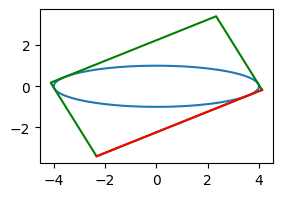

In [ ]:
# Example
make_plot(4,1,0.5)


Please enter the figsize (two numbers separated by comma): 4,4


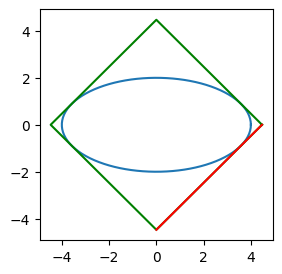

In [ ]:
make_plot(4.,2.,m*) # replace m* by the slope of the red size for circumscribed square

In [ ]:
# Useful web page: https://docs.sympy.org/latest/modules/plotting.html



## Possible extra task
Make a function that takes parameters $a,\,b$ and plots the graph of the area of the circumscribed rectangle as a function of the slope $m$.